Creating and training a model with TFOD is very easy if the proper procedure is followed.

In this notebook, I have created and mentioned a step-by-step guide for training a module using TFOD.

Details about the code have been mentioned in Markdown kernels.

In [1]:
import os

In the below code, constants are created and used in the further code.

In [2]:
#This is a folder name where we will save all the checkpoints of our trained model.
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
#This is the Name of our pre-trained model which we will download from the TFOD Model Zoo library.
#Here SSD mobilenet model is used which is trained on the coco dataset.
#You can visit TFOD Model Zoo and check all the available models.
#Selection of a model is based on the Application on which you are working.
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
#This is the pre-trained model URL.
#Further we will download our model from this URL.
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
#This is a script for generating tfrecords.
#tfrecord is nothing but TFOD understandable file format in which Image labels are mentioned.
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
#This file includes Lebel information.
LABEL_MAP_NAME = 'label_map.pbtxt'

We have created a folder structure to save all the required data in an organized way such as to save our pre-trained model, to save checkpoints, images and their labels, TFOD Setup files and etc,

In the below Kernel, we have created paths for the same. In further kernels, we will create all these folders using for loop and os module.

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In the below kernel, we are creating the constant in the form of the dictionary to access the particular files in the further code.

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

The below Code will create the required folders mentioned in the paths dictionary.

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [5]:
import wget

In the below kernel, we are cloning the TFOD git repository.

The Repo is getting Cloned in APIMODEL_PATH folder.

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

### Protocal Buffers Library

Before Doing the setup of TFOD API the very important step to perform is configuring the protocol buffer library.

For Configuring the model and training parameter TFOD API uses a protocol buffer library. Hence before using the framework this library has to be downloaded and compiled. 

Protocol Buffer libraries are available for Python, C++, Java and many other languages. Here we have used Protoc 3.15.6 release. 

https://github.com/protocolbuffers/protobuf/releases

You can go through the above link for downloading the protoc file.

After configuring the Protoc we have run the Setup.py file for configuring TFOD API.

In [ ]:
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

In the below kernel, we are running the verification script which is given by TFOD APT itself.

When you will try this code in your system, Before doing anything first very important step is creating the virtual environment. Once the setup.py file running is completed you can run the verification script. After running the verification script it should show the below message at the end.

OK (skipped=1)

This means all the packages are installed correctly. But In any case, if a package not found error is coming then we suppose to reinstall that same package and run the verification script again. Do it until you get "OK (skipped=1)" message at the end.

Under your "Environment_name/lib/Site-Packages" folder you can see all your installed packages.

In [16]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

C:\Users\ALTEM-SERVER\Desktop\Dekstop\New_folder\I_Neuron\Projects\jupyter_img_capture\tfod\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
Running tests under Python 3.9.7: C:\Users\ALTEM-SERVER\Desktop\Dekstop\New_folder\I_Neuron\Projects\jupyter_img_capture\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2

In [14]:
pip list

Package                      Version   Editable project location
---------------------------- --------- ----------------------------------------------------------------------------------------------------------------------
absl-py                      1.3.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.2.0
certifi                      2022.12.7
charset-normalizer           2.1.1
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.6
cycler                       0.11.0
debugpy                      1.6.4
decorator                    5.1.1
entrypoints                  0.4
executing                    1.2.0
flatbuffers                  22.12.6
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.15.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.51.1

In [18]:
#pip install tensorflow-addons==0.16.1

     ------------------------------------ 755.8/755.8 kB 973.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.11.2 requires Cython, which is not installed.
tf-models-official 2.11.2 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.11.2 requires immutabledict, which is not installed.
tf-models-official 2.11.2 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.11.2 requires oauth2client, which is not installed.
tf-models-official 2.11.2 requires opencv-python-headless, which is not installed.
tf-models-official 2.11.2 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.11.2 requires pycocotools, which is not installed.
tf-models-official 2.11.2 requires sentencepiece, which is not installed.
tf-models-official 2.11.2 requires seqeval, which is not installed.
tf-models-official 2.11.2 requires tensorflow-datasets, which is not i

In [6]:
import object_detection

In the below kernel, we are downloading the pertained model, extracting it and saving it back to the above-mentioned predefined path.

In [21]:
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

  7% [.....                                                                   ]  1499136 / 20515344

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


the label map file contains all the labels and their respective ids.

The label names which we have given while creating labels on the images label names in the label map files should be exactly the same. If you need to know how to create labels please ping me on my email id. I have mentioned my email id at the end of the Notebook. 

We have written the labels in lebelmap file with the code mentioned below.

In [22]:
labels = [{'name':'Shubham', 'id':1}, {'name':'Cup', 'id':2}, {'name':'Pen', 'id':3}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

Different object detection modules require different file formats for Image labelling. Eg. YOLO V5 needs YOLO format, Detectron needs CSV format likewise TFOD needs TF_records format i.e. .record format. 
When you are using labelimg tools for image labelling only 2 formats are available for labelling i.e. one is YOLO and the other is PascalVOC format.

PascalVOC format is nothing but an XML file containing information about the labels, mainly label names and label coordinates. Hence in such cases, you need to convert PascalVOC format to tf_record format. 

To perform such conversion already written scripts are available you only suppose to give an image path and a path to save the output. 

After running the below kernel will download the script from a GitHub account and save it into the particular location. I will also upload the generate_tf_record.py file in my git hub. You can simply search for the file download it and place it into the above-mentioned path which is under the scripts folder. I have mentioned my git hub repo link at the end of this Notebook

In [23]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}


Cloning into 'Tensorflow\scripts'...


Below is the script for converting labels into tf_record format.

In [26]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [25]:
#pip install pytz

     -------------------------------------- 499.4/499.4 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Pipeline.config file is very important to look into. It contains all the necessary information that should be changed as per our application.

This file contains the number of classes, location of lebelmap file, data augmentation information and many more things. Further, we will see how many things should be changed compulsory based on the application on which we are working. 

In [27]:
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


In [7]:
# Importing all the required packages
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [7]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [10]:
config

{'model': ssd {
   num_classes: 3
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [31]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In the below kernel, the information that should be changed is given. As of now in the below code, all the paths are mentioned correctly hence you only suppose to change a number of classes. In my application, I have 3 classes.

Batch size also can be changed. I have very fewer data to train hence I am using less batch size. Other than that before running the code please verify all the file paths are correct in the pipeline.config file. 

In [11]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 3
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

NameError: name 'labels' is not defined

In [33]:
#We are opening the pipeline file in the write mode and changing the things mentioned above.
#If you do not want to make it via code you can do it manually as well by opening the config file.
#But all the paths should be correct.
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

For training, the model in model/research/object_detection folder model_main_tf2.py file is used.

In [13]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

Below the command is written for running the 'model_main_tf2.py' file.

--model_dir takes the checkpoint file path of our pre-trained model.

--pipleline_config_path taken the path of the pipeline_config file.

--num_train_steps are a number of epochs we can mention accordingly. The higher the epoch higher will be the accuracy.

These are the required inputs for running the model_main_tf2.py file

In [14]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=1000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=1000


After running this command it will start model training and save all the checkpoints at CHECKPOINT_PATH  mentioned in the Paths above

In [19]:
!{command}

C:\Users\ALTEM-SERVER\Desktop\Dekstop\New_folder\I_Neuron\Projects\jupyter_img_capture\tfod\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
2023-01-02 11:03:08.858930: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in per

In [17]:
pip install pycocotools

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp39-cp39-win_amd64.whl size=75496 sha256=5589ecbba599954d405310e27b058f7df88d0197ebf15762dbaf17ea7d364307
  Stored in directory: c:\users\altem-server\appdata\local\pip\cache\wheels\29\98\97\6c7dca1f8e4c854e15a2676ac98ae3f46ec83ee031d827a5c8
Successfully built pycocotools
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
tf-models-official 2.11.2 requires Cython, which is not installed.
tf-models-official 2.11.2 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.11.2 requires immutabledict, which is not installed.
tf-models-official 2.11.2 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.11.2 requires oauth2client, which is not installed.
tf-models-official 2.11.2 requires opencv-python-headless, which is not installed.
tf-models-official 2.11.2 requires py-

### Loading the trained model

If you executed the above part of the codes successfully it means you have created and trained your model. You will get your checkpoints saved under CUSTOM_MODEL_PATH. 

After completing the training of the model the next thing you need to know is How to use your trained model? We will see this now.

Once your model is ready and you want to use it in your application below code will help you out.

In the further coding, I have loaded the model and performed inferencing on it in jupyter notebook itself. In the next upcoming article, I will show how you can create a flask app and actually deploy the model.

In the below kernel, we have imported all the required libraries.

In [8]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

C:\Users\ALTEM-SERVER\Desktop\Dekstop\New_folder\I_Neuron\Projects\jupyter_img_capture\tfod\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [9]:
# Loading the pipeline config file and building a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

In [10]:
# Restore checkpoint
# While restoring the checkpoints you can use your latest checkpoint name.
# Here is my case ckpt-3 is the latest checkpoint.
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

## Detect An image

In [11]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from pathlib import Path

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


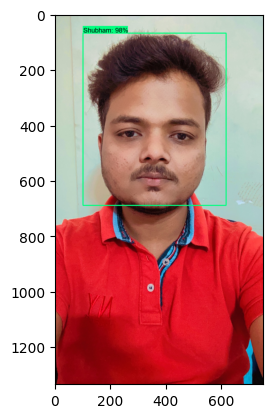

In [12]:
#Indexing the labelmap file.
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
# Giving the image path which is to be detected.
IMAGE_PATH= os.path.join('Tensorflow', 'workspace','images')
img_path= os.path.join(IMAGE_PATH, '074f43fb-21e0-4c7d-a313-a5bcd2f2466d.jpg')

#Loading the imaage using opencv module.
img = cv2.imread(img_path)
image_np = np.array(img)

#This is the image preprossing step.
# It is a important step to perform before sending the image to detection module.
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
# Loading the another image and checking the inferencing. 
img_path= os.path.join(IMAGE_PATH, 'train', 'WithCUP.7ab94cce-83b6-11ed-8819-98fa9bfba7d0.jpg')

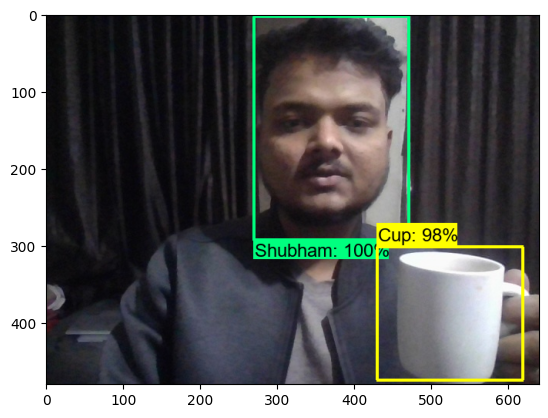

In [20]:
#Loading the imaage using opencv module.
img = cv2.imread(img_path)
image_np = np.array(img)

#This is the image preprossing step.
# It is a important step to perform before sending the image to detection module.
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

The images which I collected were not very clear and I have not captured images from different angles. I have trained this model on 60 images only. But still model is giving a nice accuracy. If your system has good hardware including a graphics card you can train your data on the even bigger dataset, otherwise you can use google collab for training the model.

### This is an object detection API. I have played a small trick here, to the Face class I have given my name. Which does not mean that model is recognizing me it is recognizing the face. It is recognizing face as Shubham label. 

In [ ]:
#Below code will open the live camera and detect the object

In [13]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

GitHub Link: https://github.com/Shubhamlad1/Object_detection_with_TFOD

This perticular notebook is available on GitHub link mentioned above. 